In [ ]:
# Import Required Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df = pd.read_csv("UCI_Credit_Card.csv")
print(df.shape)
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Data Understanding
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
# Define Features & Target
X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [ ]:
# Feature Scaling (for Logistic Regression)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training Model - Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Training Model - Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# Model Evaluation
models = [("Logistic Regression", lr), ("Random Forest", rf)]

for name, model in models:
    if name == "Logistic Regression":
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:,1]
    else:
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print(confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500

ROC AUC: 0.7157150937455593
[[5673  168]
 [1259  400]]

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.66      0.37      0.48      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500

ROC AUC: 0.7597332423549973
[[5517  324]
 [1037  622]]


In [ ]:
# Choosing Model
final_model = rf

In [ ]:
# Credit Score Calculation
# Get probability of default
probability_of_default = final_model.predict_proba(X_test)[:, 1]

# Convert to credit score
credit_score = (1 - probability_of_default) * 850

credit_score[:10]

array([378.25, 476.  , 675.75, 501.5 , 692.75, 790.5 , 225.25, 709.75,
       760.75, 773.5 ])

In [ ]:
# Create Credit Score Categories
def credit_category(score):
    if score >= 750:
        return "Low Risk"
    elif score >= 600:
        return "Medium Risk"
    else:
        return "High Risk"

credit_categories = [credit_category(score) for score in credit_score]

In [ ]:
# Create Final Credit Score Output Table
results = X_test.copy()
results["Default_Probability"] = probability_of_default
results["Credit_Score"] = credit_score
results["Credit_Risk"] = credit_categories

results.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Probability,Credit_Score,Credit_Risk
16895,16896,50000.0,1,2,1,45,1,2,0,0,...,20058.0,0.0,2065.0,1376.0,701.0,705.0,706.0,0.555,378.25,High Risk
6382,6383,80000.0,2,2,1,30,1,2,0,0,...,78710.0,0.0,3299.0,2699.0,3000.0,2987.0,3100.0,0.440,476.00,High Risk
14305,14306,160000.0,1,3,1,42,1,-1,-1,-2,...,436.0,1564.0,0.0,0.0,872.0,0.0,0.0,0.205,675.75,Medium Risk
15699,15700,20000.0,1,2,1,31,1,4,3,2,...,18062.0,0.0,0.0,0.0,1000.0,1000.0,1000.0,0.410,501.50,High Risk
18485,18486,130000.0,2,2,2,26,0,0,0,2,...,131986.0,6000.0,12600.0,4900.0,5105.0,0.0,5050.0,0.185,692.75,Medium Risk


In [ ]:
# Predict Credit Score for ONE New Customer
new_customer = X_test.iloc[[0]]

prob = final_model.predict_proba(new_customer)[0][1]
score = (1 - prob) * 850
risk = credit_category(score)

print("Default Probability:", round(prob, 2))
print("Credit Score:", int(score))
print("Risk Category:", risk)

Default Probability: 0.56
Credit Score: 378
Risk Category: High Risk


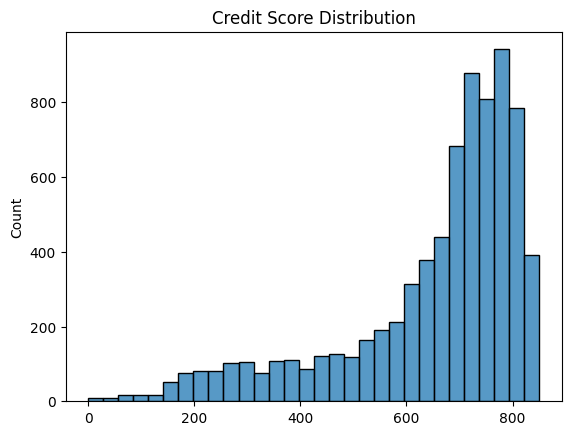

In [ ]:
# Credit Score Distribution
plt.figure()
sns.histplot(credit_score, bins=30)
plt.title("Credit Score Distribution")
plt.show()